## **Boosting Marketing Efficiency: Targeted Bank Campaign by Customer Subscription Behavior**

**Overall Project Objective:** 

Develop a data-driven marketing strategy that maximizes return on investment (ROI) by identifying optimal trade-off between broad customer outreach and precision marketing using predictive modeling.

**Notebook 3 of 3: Feature Importance & Business Impact Analysis

This notebook dives deeper into our final model and derive business insight that fulfills our overall project objective.

### **Setup & Data Load**

Libraries, the final model, and the test data load.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import precision_recall_curve, roc_curve

In [2]:
# load the trained model (random forest)
file_path = '../models/tuned_rf_mod.joblib'
tuned_rf_mod = joblib.load(file_path)

**-Data Overview-**

Only the test data files ('X_test_scaled', 'y_test') will be used in this notebook. 

In [3]:
# load the test data
X_test = pd.read_csv('../data/X_test_scaled.csv')
y_test = pd.read_csv('../data/y_test.csv').squeeze()

print("Test set shape: ", X_test.shape)

Test set shape:  (905, 37)


### **Feature Importance Analysis**

To understand why our model makes its predictions, we will begin by analyzing its feature importances. This analysis will reveal which customer attributes and campaign variables are the most powerful predictors of whether a client will subcribe. The result will be visualized using a horizontal bar plot to highlight the top 15 most influential predictors. 

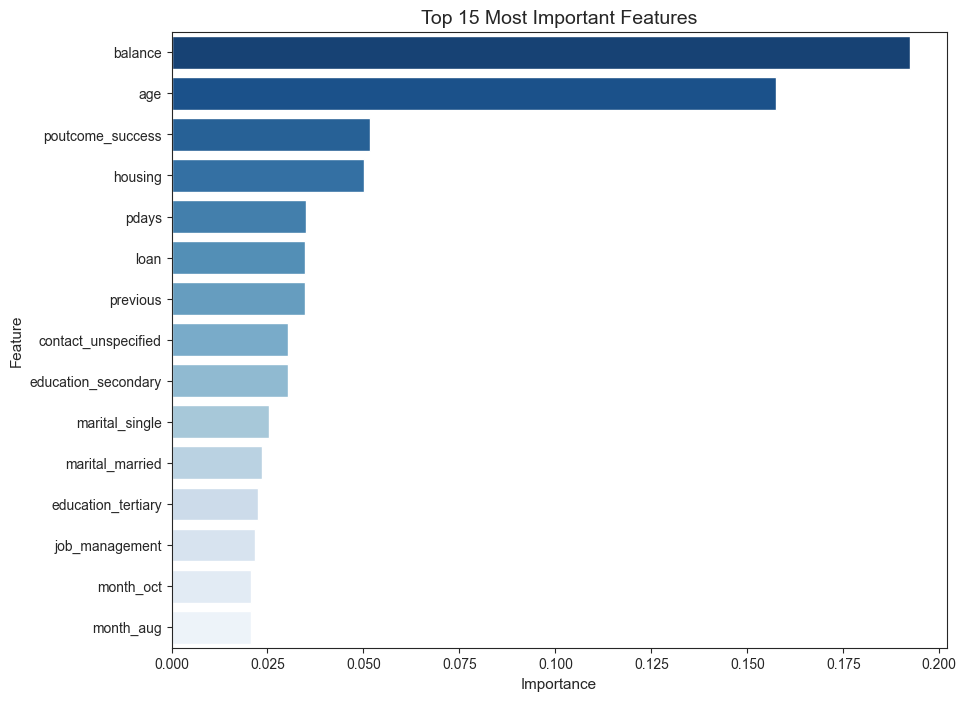

In [14]:
importance = tuned_rf_mod.feature_importances_
feature_importances = pd.Series(importance, index=X_test.columns)

top_15_features = feature_importances.sort_values(ascending=False).head(15)

sns.set_style('ticks')
plt.figure(figsize=(10,8))
sns.barplot(x=top_15_features.values, 
            y=top_15_features.index,
            hue=top_15_features.index,
            legend=False,
            palette='Blues_r')

plt.title("Top 15 Most Important Features", fontsize=14)
plt.xlabel("Importance", fontsize=11)
plt.ylabel("Feature", fontsize=11)
plt.show()

The feature importance analysis reveals that our model's predictions are driven by four key themes, providing a clear picture of the ideal customer profile. 
1. **Financial Profile:** A client's financial situation is the most dominant factor. 'Balance' is the single most important feature, followed by existing obligations such as 'housing' and 'loan'. This strongly suggests that clients with higher financial capacity and fewer debts are the primary target audience.

2. **Previous Campaign Interactions:** A client's history with the bank is highly predictive. A previous success ('poutcome_success') is the strongest indicator in this group, followed closely by the recency of the last contact ('pdays'). This proves that re-engaging with previously successful or recently contacted clients is a highly effective strategy. 

3. **Client Demographics:** While many demographic features are important, a client's 'age' is by far the most influential, reinforcing the idea that life stage is critical factor.

4. **Campaign Execution:** The analysis also validates our feature engineering, with 'contact_unspecified" ranking as a top-10 predictor. This confirms that the lack of known contact method is a significant piece of information. Seasonal factors like the month of contact also contribute to the model's predictions.

Building on these findings, the next section will examine these key themes in greater detail to further refine our business strategy.

### **Precision-Recall Trade-Off Analysis**

### **Conclusion & Recommendation**